In [1]:
#pip install streamlit

In [2]:
#pip install plotly


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Nombre de vaccinés par département

In [4]:
path_vac = "./data/Vaccinations/vacsi-a-dep-2021-02-03-20h15.csv"
data_vaccinations = spark.read.load(path_vac, format="csv", header=True, inferSchema="True")

data_vaccinations.printSchema()

root
 |-- dep: string (nullable = true)
 |-- clage_vacsi: integer (nullable = true)
 |-- jour: string (nullable = true)
 |-- n_dose1: integer (nullable = true)
 |-- n_cum_dose1: integer (nullable = true)



In [5]:
departement_vac = data_vaccinations.groupBy(["dep"]).sum("n_dose1").withColumnRenamed("sum(n_dose1)", "sum_vac").sort(["dep"])
departement_vac.printSchema()

root
 |-- dep: string (nullable = true)
 |-- sum_vac: long (nullable = true)



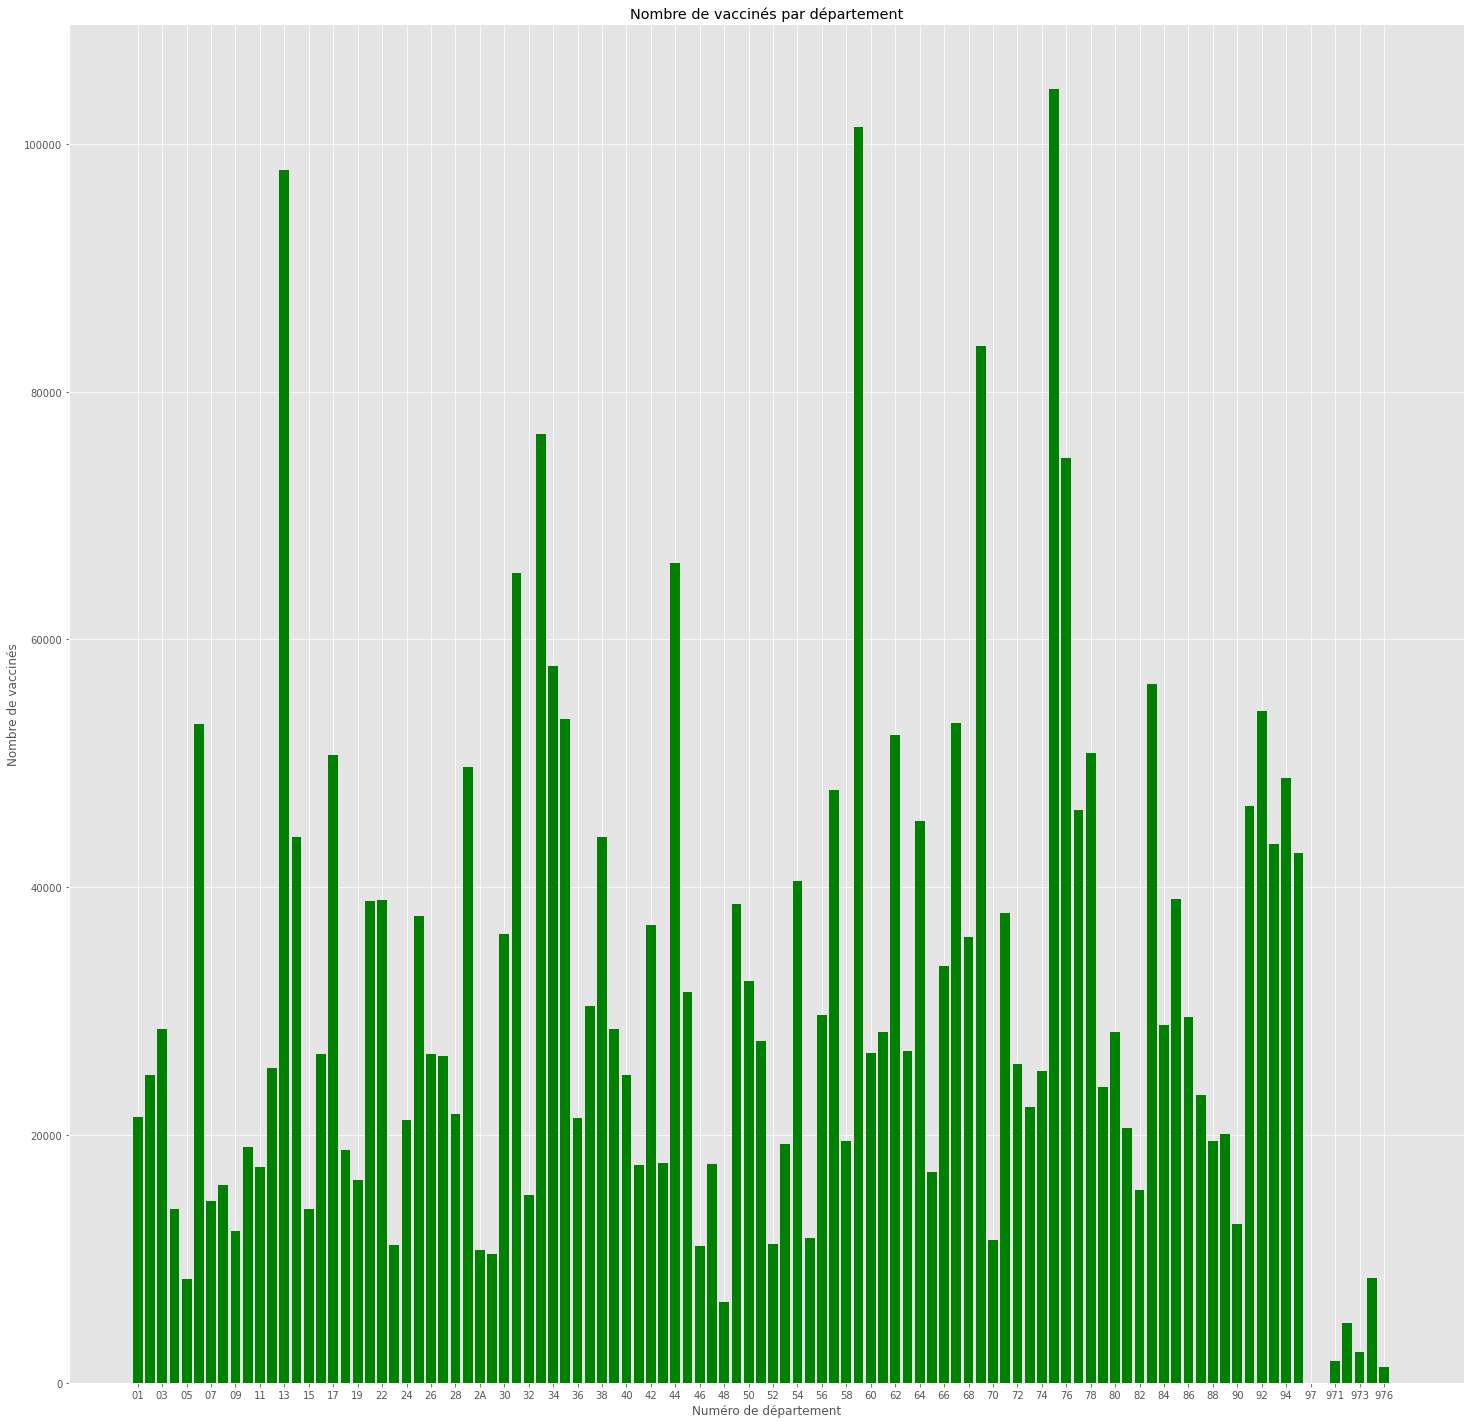

In [7]:
plt.style.use('ggplot')

x = departement_vac.select('dep').rdd.map(lambda row : row[0]).collect()

y = departement_vac.select('sum_vac').rdd.map(lambda row : row[0]).collect()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel("Numéro de département")
plt.ylabel("Nombre de vaccinés")
plt.title("Nombre de vaccinés par département")

plt.xticks(x_pos, x)

fig = plt.gcf()
fig.set_size_inches(25,25)
plt.locator_params(axis='x', nbins=100)
plt.show()

# Nombre de vaccinées par tranche d'âge

In [ ]:
dep_vac = data_vaccinations.groupBy(["dep"]).sum("n_dose1").withColumnRenamed("sum(n_dose1)", "sum_vac").sort(["dep"])
dep_vac.printSchema()

In [ ]:
newvacc = vacc.select(["clage_vacsi", "n_cum_dose1"])
#newvacc.collect()

In [ ]:
nbVaccByAge = newvacc.where( newvacc.clage_vacsi != "0").groupBy("clage_vacsi").agg({"n_cum_dose1" : "max"}).sort(["clage_vacsi"])

In [ ]:
#newvacc.where( newvacc.clage_vacsi == "0").groupBy("clage_vacsi").agg({"n_cum_dose1" : "max"}).sort(["clage_vacsi"]).collect()

In [ ]:
nbVaccByAge.show()


In [ ]:
nbVaccByAge.collect()


In [ ]:
type(nbVaccByAge)

In [ ]:
nbVaccByAge.show()


In [ ]:
#Sauvegarder les données récupérées dans un csv
nbVaccByAge.toPandas().to_csv("./data/save/nb_vacc_by_age.csv", header=True, index=False)

In [ ]:
#lire le csv sauvegardé

#nbVaccByAge_data = spark.read.load("./data/save/nb_vacc_by_age.csv", format="csv", header=True, inferSchema="True")

nbVaccByAge_data = pd.read_csv('./data/save/nb_vacc_by_age.csv')

In [ ]:
type(nbVaccByAge_data)

In [ ]:
nbVaccByAge_data.head()